# About the dataset 

We'll work with data from the [S&P500 Index][1]. The S&P500 is a stock market index, that aggregates the prices of multiple stocks(of companies) together, and allow us to see how the market as a whole performs.

We'll be using historical data on the price of the S&P500 Index to make predictions about future prices. 
* Predicting whether an index goes up or down helps forecast how the stock market as a whole performs. 
* Since stocks tend to correlate with how well the economy as a whole is performs, it can also help with economic forecasts.

There are thousands of traders who make money by buying and selling [Exchange Traded Funds][2]. ETFs allow us to buy and sell indexes like stocks. This means that we could "buy" the S&P500 Index ETF when the price is low and sell when it's high to make a profit. 
* Creating a predictive model could allow traders to make money on the stock market.

[1]: https://en.wikipedia.org/wiki/S%26P_500
[2]: https://en.wikipedia.org/wiki/Exchange-traded_fund

Each row in the file contains a daily record of the price of the S&P500 Index from 1950 to 2015. The dataset is stored in `sphist.csv`
*  We'll train the model with data from 1950-2012 and try to make predictions from 2013-2015.

# Reading in the data

In [1]:
from IPython.display import display

from re import search
import numpy as np
import pandas as pd
from datetime import datetime

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
pd.options.display.max_columns = 500

In [3]:
trade_prices = pd.read_csv("sphist.csv")
sp_500_idx_prices = trade_prices.copy()
sp_500_idx_prices

,Date,Open,High,Low,Close,Volume,Adj Close
0,2015-12-07,2090.419922,2090.419922,2066.780029,2077.070068,4.043820e+09,2077.070068
1,2015-12-04,2051.239990,2093.840088,2051.239990,2091.689941,4.214910e+09,2091.689941
2,2015-12-03,2080.709961,2085.000000,2042.349976,2049.620117,4.306490e+09,2049.620117
3,2015-12-02,2101.709961,2104.270020,2077.110107,2079.510010,3.950640e+09,2079.510010
4,2015-12-01,2082.929932,2103.370117,2082.929932,2102.629883,3.712120e+09,2102.629883
...,...,...,...,...,...,...,...
16585,1950-01-09,17.080000,17.080000,17.080000,17.080000,2.520000e+06,17.080000
16586,1950-01-06,16.980000,16.980000,16.980000,16.980000,2.010000e+06,16.980000
16587,1950-01-05,16.930000,16.930000,16.930000,16.930000,2.550000e+06,16.930000
16588,1950-01-04,16.850000,16.850000,16.850000,16.850000,1.890000e+06,16.850000


The columns of the dataset are:

* `Date` -- The date of the record.
* `Open` -- The opening price of the day (when trading starts).
* `High` -- The highest trade price during the day.
* `Low` -- The lowest trade price during the day.
* `Close` -- The closing price for the day (when trading is finished).
* `Volume` -- The number of shares traded.
* `Adj Close` -- The daily closing price, adjusted retroactively to include any corporate actions. Read more [here][1].

[1]: https://www.investopedia.com/terms/a/adjusted_closing_price.asp

In [4]:
sp_500_idx_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16590 entries, 0 to 16589
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       16590 non-null  object 
 1   Open       16590 non-null  float64
 2   High       16590 non-null  float64
 3   Low        16590 non-null  float64
 4   Close      16590 non-null  float64
 5   Volume     16590 non-null  float64
 6   Adj Close  16590 non-null  float64
dtypes: float64(6), object(1)
memory usage: 907.4+ KB


We'll need to do some processing to correct the column types and then sort the dataset (as its in descending order of dates).

In [5]:
# Converting the 'Date' column to an appropriate Pandas date type.
sp_500_idx_prices["Date"] = pd.to_datetime(sp_500_idx_prices["Date"])
sp_500_idx_prices.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Volume              float64
Adj Close           float64
dtype: object

In [6]:
# Sorting the dataframe on the Date column.
sp_500_idx_prices.sort_values('Date',inplace=True,ignore_index=True)
sp_500_idx_prices

,Date,Open,High,Low,Close,Volume,Adj Close
0,1950-01-03,16.660000,16.660000,16.660000,16.660000,1.260000e+06,16.660000
1,1950-01-04,16.850000,16.850000,16.850000,16.850000,1.890000e+06,16.850000
2,1950-01-05,16.930000,16.930000,16.930000,16.930000,2.550000e+06,16.930000
3,1950-01-06,16.980000,16.980000,16.980000,16.980000,2.010000e+06,16.980000
4,1950-01-09,17.080000,17.080000,17.080000,17.080000,2.520000e+06,17.080000
...,...,...,...,...,...,...,...
16585,2015-12-01,2082.929932,2103.370117,2082.929932,2102.629883,3.712120e+09,2102.629883
16586,2015-12-02,2101.709961,2104.270020,2077.110107,2079.510010,3.950640e+09,2079.510010
16587,2015-12-03,2080.709961,2085.000000,2042.349976,2049.620117,4.306490e+09,2049.620117
16588,2015-12-04,2051.239990,2093.840088,2051.239990,2091.689941,4.214910e+09,2091.689941


# Generating Indicators 

Stock market data is sequential and each observation comes a day after the previous observation. Thus, the observations are not all independent and you can't treat them as such.

The time series nature of the data means that we can generate indicators for each row to make our model more accurate. 
* For instance, we can create a new column that contains the average price of the last 10 trades for each row. This incorporates information from multiple prior rows into one and makes predictions much more accurate.

When we do this, we have to be careful not to use the current row in the values we average.
* We want to teach the model how to predict the current price from historical prices. 
* If we include the current price in the prices we average, it will be equivalent to handing the answers to the model upfront, and will make it impossible to use in the "real world", where we don't know the price upfront.

NOTE : 
1. We assume that "price" means the Close column (i.e. the closing price for that day).
2. 'Days' mean 'trading days', so if we're computing the average of the past `x` days, it should be the `x` most recent tarding dates before the current one.
3. The stock market is shutdown on certain holidays. Hence, while calculating the average closing price for past `x` days, we might need to take more than `x` prior calendar days into account to find the `x` past trading days.

Here's a diagram that shows how we average five days to get the average closing price for 1951-01-03:
![Image](indicator_calculation_illustration.JPG)
* 3 calendar days in [1950][1] and [1951][2] were holidays.

[1]: https://www.timeanddate.com/calendar/?year=1950&country=1
[2]: https://www.timeanddate.com/calendar/?year=1951&country=1

Some indicators that are interesting to generate for each row could be:

* The average price for the past 5 days/30 days/365 days.
* The ratio between the average price for the past 5 days, and the average price for the past 365 days.
* The standard deviation of the price over the past 5 days/30 days/365 days.
* The ratio between the standard deviation for the past 5 days, and the standard deviation for the past 365 days.

Let's explore the following indicators and generate columns for each indicator:-
1. The average price for the past 5 days/30 days/365 days.
2. The ratio between the average price for the past 5 days, and the average price for the past 365 days.
3. The standard deviation of the price over the past 5 days/30 days/365 days.
4. The ratio between the standard deviation for the past 5 days, and the standard deviation for the past 365 days.

## Exploring the `Close` column

In [7]:
sp_500_idx_prices['Date'].dt.day_name().unique()

array(['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Monday'],
      dtype=object)

It's clear that the calendar days that are non-trading days (weekend and other holidays) are omitted from the dataset(so only trading days are present). So we can proceed to find average closing prices(indicators) for each observation, by taking an appropriate number of continguous values of the `Close` column.

## Generating various indicators

In [8]:
def compute_indicators(dataset_column,indicator_func,num_historical_trading_days):
    indicator_values = list()
    
    for daily_record in sp_500_idx_prices.itertuples():
        if daily_record.Index < num_historical_trading_days:
            avg_indicator_value = 0
        else:
            avg_indicator_value = indicator_func(sp_500_idx_prices.loc[daily_record.Index - num_historical_trading_days:daily_record.Index,dataset_column])
        indicator_values.append(avg_indicator_value)
        
    return indicator_values

### The average price for the past 5 days/30 days/365 days

In [9]:
# past 5 trading days:
sp_500_idx_prices['5_day_avg_closing_price'] = compute_indicators(dataset_column='Close' ,indicator_func=np.mean,num_historical_trading_days=5)

# past 30 trading days(1 trading month):
sp_500_idx_prices['30_day_avg_closing_price'] = compute_indicators(dataset_column='Close',indicator_func=np.mean,num_historical_trading_days=30)

# past 365 trading days(1 trading year):
sp_500_idx_prices['365_day_avg_closing_price'] = compute_indicators(dataset_column='Close',indicator_func=np.mean,num_historical_trading_days=365)

In [10]:
# checking the output
with pd.option_context('display.max_rows', 366):
    display(sp_500_idx_prices.head(366))

,Date,Open,High,Low,Close,Volume,Adj Close,5_day_avg_closing_price,30_day_avg_closing_price,365_day_avg_closing_price
0,1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000.0,16.660000,0.000000,0.000000,0.000000
1,1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000.0,16.850000,0.000000,0.000000,0.000000
2,1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000.0,16.930000,0.000000,0.000000,0.000000
3,1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000.0,16.980000,0.000000,0.000000,0.000000
4,1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000.0,17.080000,0.000000,0.000000,0.000000
5,1950-01-10,17.030001,17.030001,17.030001,17.030001,2160000.0,17.030001,16.921667,0.000000,0.000000
6,1950-01-11,17.090000,17.090000,17.090000,17.090000,2630000.0,17.090000,16.993334,0.000000,0.000000
7,1950-01-12,16.760000,16.760000,16.760000,16.760000,2970000.0,16.760000,16.978334,0.000000,0.000000
8,1950-01-13,16.670000,16.670000,16.670000,16.670000,3330000.0,16.670000,16.935000,0.000000,0.000000
9,1950-01-16,16.719999,16.719999,16.719999,16.719999,1460000.0,16.719999,16.891667,0.000000,0.000000


### The ratio between the average price for the past 5 days, and the average price for the past 365 days

In [11]:
sp_500_idx_prices['5days_by_365days_avg_closing_price_ratio'] = sp_500_idx_prices['5_day_avg_closing_price']/sp_500_idx_prices['365_day_avg_closing_price']

sp_500_idx_prices['5days_by_365days_avg_closing_price_ratio'].replace(np.inf,np.nan,inplace=True)

In [12]:
# checking the output
with pd.option_context('display.max_rows', 366):
    display(sp_500_idx_prices.head(366))

,Date,Open,High,Low,Close,Volume,Adj Close,5_day_avg_closing_price,30_day_avg_closing_price,365_day_avg_closing_price,5days_by_365days_avg_closing_price_ratio
0,1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000.0,16.660000,0.000000,0.000000,0.000000,NaN
1,1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000.0,16.850000,0.000000,0.000000,0.000000,NaN
2,1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000.0,16.930000,0.000000,0.000000,0.000000,NaN
3,1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000.0,16.980000,0.000000,0.000000,0.000000,NaN
4,1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000.0,17.080000,0.000000,0.000000,0.000000,NaN
5,1950-01-10,17.030001,17.030001,17.030001,17.030001,2160000.0,17.030001,16.921667,0.000000,0.000000,NaN
6,1950-01-11,17.090000,17.090000,17.090000,17.090000,2630000.0,17.090000,16.993334,0.000000,0.000000,NaN
7,1950-01-12,16.760000,16.760000,16.760000,16.760000,2970000.0,16.760000,16.978334,0.000000,0.000000,NaN
8,1950-01-13,16.670000,16.670000,16.670000,16.670000,3330000.0,16.670000,16.935000,0.000000,0.000000,NaN
9,1950-01-16,16.719999,16.719999,16.719999,16.719999,1460000.0,16.719999,16.891667,0.000000,0.000000,NaN


### The standard deviation of the price over the past 5 days/30 days/365 days

In [13]:
# past 5 trading days:
sp_500_idx_prices['5_day_closing_price_std'] = compute_indicators(dataset_column='Close',indicator_func=np.std,num_historical_trading_days=5)

# past 30 trading days(1 trading month):
sp_500_idx_prices['30_day_closing_price_std'] = compute_indicators(dataset_column='Close',indicator_func=np.std,num_historical_trading_days=30)

# past 365 trading days(1 trading year):
sp_500_idx_prices['365_day_closing_price_std'] = compute_indicators(dataset_column='Close',indicator_func=np.std,num_historical_trading_days=365)

In [14]:
# checking the output
with pd.option_context('display.max_rows', 366):
    display(sp_500_idx_prices.head(366))

,Date,Open,High,Low,Close,Volume,Adj Close,5_day_avg_closing_price,30_day_avg_closing_price,365_day_avg_closing_price,5days_by_365days_avg_closing_price_ratio,5_day_closing_price_std,30_day_closing_price_std,365_day_closing_price_std
0,1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000.0,16.660000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000
1,1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000.0,16.850000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000
2,1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000.0,16.930000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000
3,1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000.0,16.980000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000
4,1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000.0,17.080000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000
5,1950-01-10,17.030001,17.030001,17.030001,17.030001,2160000.0,17.030001,16.921667,0.000000,0.000000,NaN,0.137770,0.000000,0.000000
6,1950-01-11,17.090000,17.090000,17.090000,17.090000,2630000.0,17.090000,16.993334,0.000000,0.000000,NaN,0.084591,0.000000,0.000000
7,1950-01-12,16.760000,16.760000,16.760000,16.760000,2970000.0,16.760000,16.978334,0.000000,0.000000,NaN,0.112163,0.000000,0.000000
8,1950-01-13,16.670000,16.670000,16.670000,16.670000,3330000.0,16.670000,16.935000,0.000000,0.000000,NaN,0.161735,0.000000,0.000000
9,1950-01-16,16.719999,16.719999,16.719999,16.719999,1460000.0,16.719999,16.891667,0.000000,0.000000,NaN,0.177897,0.000000,0.000000


### The ratio between the standard deviation for the past 5 days, and the standard deviation for the past 365 days

In [15]:
sp_500_idx_prices['5days_by_365days_closing_price_std_ratio'] = sp_500_idx_prices['5_day_closing_price_std']/sp_500_idx_prices['365_day_closing_price_std']

sp_500_idx_prices['5days_by_365days_closing_price_std_ratio'].replace(np.inf,np.nan,inplace=True)

In [16]:
# checking the output
with pd.option_context('display.max_rows', 366):
    display(sp_500_idx_prices.head(366))

,Date,Open,High,Low,Close,Volume,Adj Close,5_day_avg_closing_price,30_day_avg_closing_price,365_day_avg_closing_price,5days_by_365days_avg_closing_price_ratio,5_day_closing_price_std,30_day_closing_price_std,365_day_closing_price_std,5days_by_365days_closing_price_std_ratio
0,1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000.0,16.660000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN
1,1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000.0,16.850000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN
2,1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000.0,16.930000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN
3,1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000.0,16.980000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN
4,1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000.0,17.080000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN
5,1950-01-10,17.030001,17.030001,17.030001,17.030001,2160000.0,17.030001,16.921667,0.000000,0.000000,NaN,0.137770,0.000000,0.000000,NaN
6,1950-01-11,17.090000,17.090000,17.090000,17.090000,2630000.0,17.090000,16.993334,0.000000,0.000000,NaN,0.084591,0.000000,0.000000,NaN
7,1950-01-12,16.760000,16.760000,16.760000,16.760000,2970000.0,16.760000,16.978334,0.000000,0.000000,NaN,0.112163,0.000000,0.000000,NaN
8,1950-01-13,16.670000,16.670000,16.670000,16.670000,3330000.0,16.670000,16.935000,0.000000,0.000000,NaN,0.161735,0.000000,0.000000,NaN
9,1950-01-16,16.719999,16.719999,16.719999,16.719999,1460000.0,16.719999,16.891667,0.000000,0.000000,NaN,0.177897,0.000000,0.000000,NaN


# Splitting Up the Data

Since we're computing indicators that use historical data, there are some rows for which there isn't enough historical data to generate them.
* eg. Some of the indicators use 365 days of historical data and the dataset starts on 1950-01-03. Thus, any rows that fall before 1951-01-03 don't have enough historical data to compute all the indicators. We'll need to remove these rows before we split the data.

In [17]:
cleaned_sp_500_idx_prices = sp_500_idx_prices.dropna(axis='index').copy()
cleaned_sp_500_idx_prices

,Date,Open,High,Low,Close,Volume,Adj Close,5_day_avg_closing_price,30_day_avg_closing_price,365_day_avg_closing_price,5days_by_365days_avg_closing_price_ratio,5_day_closing_price_std,30_day_closing_price_std,365_day_closing_price_std,5days_by_365days_closing_price_std_ratio
365,1951-06-19,22.020000,22.020000,22.020000,22.020000,1.100000e+06,22.020000,21.836667,21.713548,19.454754,1.122433,0.224698,0.461467,1.790397,0.125501
366,1951-06-20,21.910000,21.910000,21.910000,21.910000,1.120000e+06,21.910000,21.901667,21.690323,19.469098,1.124945,0.174492,0.431931,1.788979,0.097537
367,1951-06-21,21.780001,21.780001,21.780001,21.780001,1.100000e+06,21.780001,21.940000,21.663548,19.482568,1.126135,0.104083,0.398526,1.787768,0.058220
368,1951-06-22,21.549999,21.549999,21.549999,21.549999,1.340000e+06,21.549999,21.891667,21.628387,19.495191,1.122926,0.179390,0.356715,1.786010,0.100442
369,1951-06-25,21.290001,21.290001,21.290001,21.290001,2.440000e+06,21.290001,21.766667,21.589032,19.506967,1.115841,0.270596,0.322984,1.783594,0.151714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16585,2015-12-01,2082.929932,2103.370117,2082.929932,2102.629883,3.712120e+09,2102.629883,2089.625000,2074.909026,2035.714508,1.026482,6.636967,24.376807,64.289624,0.103235
16586,2015-12-02,2101.709961,2104.270020,2077.110107,2079.510010,3.950640e+09,2079.510010,2088.444987,2076.388058,2036.033197,1.025742,7.627186,23.191327,64.216794,0.118772
16587,2015-12-03,2080.709961,2085.000000,2042.349976,2049.620117,4.306490e+09,2049.620117,2081.858358,2076.996125,2036.270929,1.022388,16.307612,22.213787,64.105500,0.254387
16588,2015-12-04,2051.239990,2093.840088,2051.239990,2091.689941,4.214910e+09,2091.689941,2082.328328,2079.342899,2036.658115,1.022424,16.541863,19.651547,64.011030,0.258422


In [18]:
cleaned_sp_500_idx_prices.isnull().sum()

Date                                        0
Open                                        0
High                                        0
Low                                         0
Close                                       0
Volume                                      0
Adj Close                                   0
5_day_avg_closing_price                     0
30_day_avg_closing_price                    0
365_day_avg_closing_price                   0
5days_by_365days_avg_closing_price_ratio    0
5_day_closing_price_std                     0
30_day_closing_price_std                    0
365_day_closing_price_std                   0
5days_by_365days_closing_price_std_ratio    0
dtype: int64

Train set should contain any rows in the data with a date less than 2013-01-01. Test set should contain any rows with a date greater than or equal to 2013-01-01.

In [19]:
# generating train and test sets
train_set = cleaned_sp_500_idx_prices.loc[cleaned_sp_500_idx_prices['Date'] < datetime(year=2013,month=1,day=1)].copy().reset_index(drop=True)
test_set = cleaned_sp_500_idx_prices.loc[cleaned_sp_500_idx_prices['Date'] >= datetime(year=2013,month=1,day=1)].copy().reset_index(drop=True)

In [20]:
train_set

,Date,Open,High,Low,Close,Volume,Adj Close,5_day_avg_closing_price,30_day_avg_closing_price,365_day_avg_closing_price,5days_by_365days_avg_closing_price_ratio,5_day_closing_price_std,30_day_closing_price_std,365_day_closing_price_std,5days_by_365days_closing_price_std_ratio
0,1951-06-19,22.020000,22.020000,22.020000,22.020000,1.100000e+06,22.020000,21.836667,21.713548,19.454754,1.122433,0.224698,0.461467,1.790397,0.125501
1,1951-06-20,21.910000,21.910000,21.910000,21.910000,1.120000e+06,21.910000,21.901667,21.690323,19.469098,1.124945,0.174492,0.431931,1.788979,0.097537
2,1951-06-21,21.780001,21.780001,21.780001,21.780001,1.100000e+06,21.780001,21.940000,21.663548,19.482568,1.126135,0.104083,0.398526,1.787768,0.058220
3,1951-06-22,21.549999,21.549999,21.549999,21.549999,1.340000e+06,21.549999,21.891667,21.628387,19.495191,1.122926,0.179390,0.356715,1.786010,0.100442
4,1951-06-25,21.290001,21.290001,21.290001,21.290001,2.440000e+06,21.290001,21.766667,21.589032,19.506967,1.115841,0.270596,0.322984,1.783594,0.151714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15481,2012-12-24,1430.150024,1430.150024,1424.660034,1426.660034,1.248960e+09,1426.660034,1435.576680,1406.594841,1326.388744,1.082320,7.391301,24.213713,89.738483,0.082365
15482,2012-12-26,1426.660034,1429.420044,1416.430054,1419.829956,2.285030e+09,1419.829956,1433.821676,1407.884517,1326.667733,1.080769,9.399053,23.816326,89.869729,0.104585
15483,2012-12-27,1419.829956,1422.800049,1401.800049,1418.099976,2.830180e+09,1418.099976,1429.039998,1409.112580,1326.966175,1.076923,8.868107,23.324824,89.991415,0.098544
15484,2012-12-28,1418.099976,1418.099976,1401.579956,1402.430054,2.426680e+09,1402.430054,1423.476664,1410.012581,1327.201940,1.072540,12.572531,22.496640,90.075737,0.139577


In [21]:
test_set

,Date,Open,High,Low,Close,Volume,Adj Close,5_day_avg_closing_price,30_day_avg_closing_price,365_day_avg_closing_price,5days_by_365days_avg_closing_price_ratio,5_day_closing_price_std,30_day_closing_price_std,365_day_closing_price_std,5days_by_365days_closing_price_std_ratio
0,2013-01-02,1426.189941,1462.430054,1426.189941,1462.420044,4.202600e+09,1462.420044,1425.938334,1415.812260,1327.902596,1.073828,18.179158,19.234508,90.490780,0.200895
1,2013-01-03,1462.420044,1465.469971,1455.530029,1459.369995,3.829730e+09,1459.369995,1431.389994,1419.021614,1328.267432,1.077637,22.067027,17.887205,90.750536,0.243161
2,2013-01-04,1459.369995,1467.939941,1458.989990,1466.469971,3.424290e+09,1466.469971,1439.163330,1421.588710,1328.602596,1.083216,24.685164,18.779822,91.033367,0.271166
3,2013-01-07,1466.469971,1466.469971,1456.619995,1461.890015,3.304970e+09,1461.890015,1446.461670,1423.978386,1328.921913,1.088447,23.837599,19.040961,91.294990,0.261105
4,2013-01-08,1461.890015,1461.890015,1451.640015,1457.150024,3.601600e+09,1457.150024,1455.581665,1426.111289,1329.249017,1.095041,13.452376,18.933704,91.539036,0.146958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
734,2015-12-01,2082.929932,2103.370117,2082.929932,2102.629883,3.712120e+09,2102.629883,2089.625000,2074.909026,2035.714508,1.026482,6.636967,24.376807,64.289624,0.103235
735,2015-12-02,2101.709961,2104.270020,2077.110107,2079.510010,3.950640e+09,2079.510010,2088.444987,2076.388058,2036.033197,1.025742,7.627186,23.191327,64.216794,0.118772
736,2015-12-03,2080.709961,2085.000000,2042.349976,2049.620117,4.306490e+09,2049.620117,2081.858358,2076.996125,2036.270929,1.022388,16.307612,22.213787,64.105500,0.254387
737,2015-12-04,2051.239990,2093.840088,2051.239990,2091.689941,4.214910e+09,2091.689941,2082.328328,2079.342899,2036.658115,1.022424,16.541863,19.651547,64.011030,0.258422


# Making Predictions 

* Let's leave out all of the original columns (`Close`, `High`, `Low`, `Open`, `Volume`, `Adj Close`, `Date`) when training our model. These all contain knowledge of the future that we don't want to feed the model.
* Let's use the `Close` column as the target.
* Let's use Mean Absolute Error(MAE), as an error metric, because it will show us how "close" we were to the price in intuitive terms. Mean Squared Error(MSE), is an alternative that is more commonly used, but makes it harder to intuitively tell how far off we are from the true price because it squares the error.

In [22]:
# target column to make predictions for
target = 'Close'

In [23]:
# potential features for training the model
features = [col for col in sp_500_idx_prices if col not in trade_prices.columns]
features

['5_day_avg_closing_price',
 '30_day_avg_closing_price',
 '365_day_avg_closing_price',
 '5days_by_365days_avg_closing_price_ratio',
 '5_day_closing_price_std',
 '30_day_closing_price_std',
 '365_day_closing_price_std',
 '5days_by_365days_closing_price_std_ratio']

In [24]:
model_attributes = [*features,target]
model_attributes

['5_day_avg_closing_price',
 '30_day_avg_closing_price',
 '365_day_avg_closing_price',
 '5days_by_365days_avg_closing_price_ratio',
 '5_day_closing_price_std',
 '30_day_closing_price_std',
 '365_day_closing_price_std',
 '5days_by_365days_closing_price_std_ratio',
 'Close']

## Feature Selection

### Correlating features with target attribute

In [25]:
feature_targetcol_correlations = train_set[model_attributes].corr()[target].abs()
feature_targetcol_correlations

5_day_avg_closing_price                     0.999831
30_day_avg_closing_price                    0.999074
365_day_avg_closing_price                   0.986257
5days_by_365days_avg_closing_price_ratio    0.001056
5_day_closing_price_std                     0.752541
30_day_closing_price_std                    0.786405
365_day_closing_price_std                   0.801316
5days_by_365days_closing_price_std_ratio    0.098340
Close                                       1.000000
Name: Close, dtype: float64

Features that strongly correlate with the target column, from general definitions, are those that have atleast a correlation strength of about 0.7

In [26]:
strong_feature_targetcol_correlations = feature_targetcol_correlations[feature_targetcol_correlations > 0.7]
strong_feature_targetcol_correlations

5_day_avg_closing_price      0.999831
30_day_avg_closing_price     0.999074
365_day_avg_closing_price    0.986257
5_day_closing_price_std      0.752541
30_day_closing_price_std     0.786405
365_day_closing_price_std    0.801316
Close                        1.000000
Name: Close, dtype: float64

In [27]:
model_attributes = strong_feature_targetcol_correlations.index.to_list()
model_attributes

['5_day_avg_closing_price',
 '30_day_avg_closing_price',
 '365_day_avg_closing_price',
 '5_day_closing_price_std',
 '30_day_closing_price_std',
 '365_day_closing_price_std',
 'Close']

### Checking for collinearity between features

In [28]:
strongly_correlated_features_corr_mtx = train_set[model_attributes].corr()
strongly_correlated_features_corr_mtx

,5_day_avg_closing_price,30_day_avg_closing_price,365_day_avg_closing_price,5_day_closing_price_std,30_day_closing_price_std,365_day_closing_price_std,Close
5_day_avg_closing_price,1.000000,0.999379,0.986659,0.754483,0.786967,0.801330,0.999831
30_day_avg_closing_price,0.999379,1.000000,0.988424,0.765353,0.793966,0.801619,0.999074
365_day_avg_closing_price,0.986659,0.988424,1.000000,0.796100,0.832411,0.834634,0.986257
5_day_closing_price_std,0.754483,0.765353,0.796100,1.000000,0.842403,0.746611,0.752541
30_day_closing_price_std,0.786967,0.793966,0.832411,0.842403,1.000000,0.794148,0.786405
365_day_closing_price_std,0.801330,0.801619,0.834634,0.746611,0.794148,1.000000,0.801316
Close,0.999831,0.999074,0.986257,0.752541,0.786405,0.801316,1.000000


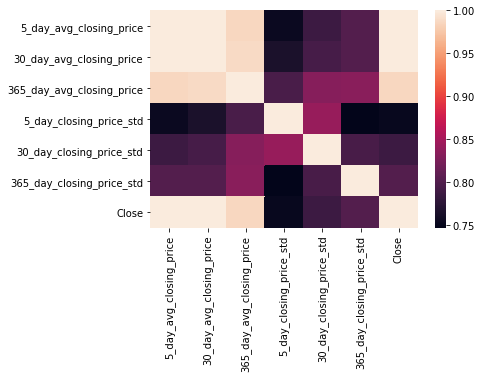

In [29]:
# plotting a correlation matrix heatmap
sns.heatmap(strongly_correlated_features_corr_mtx)
plt.show()

Among the features that are highly correlated, those pairs that stand the risk of data duplication include:
1. `5_day_avg_closing_price` and `30_day_avg_closing_price`
2. `5_day_avg_closing_price` and `365_day_avg_closing_price`
3. `30_day_avg_closing_price` and `365_day_avg_closing_price`

Let's confirm this by extracting the correlation strength between these pairs of features.

In [30]:
strongly_correlated_features_corr_mtx.loc['5_day_avg_closing_price','30_day_avg_closing_price']

0.9993794091007524

In [31]:
strongly_correlated_features_corr_mtx.loc['5_day_avg_closing_price','365_day_avg_closing_price']

0.9866589888374824

In [32]:
strongly_correlated_features_corr_mtx.loc['30_day_avg_closing_price','365_day_avg_closing_price']

0.9884242315358103

All these features are indeed posing a risk of data duplication(correlation strength > 0.9).
* `5_day_avg_closing_price` is an insignificant indicator when compared to the trove of data that we actually have. The same can be told about `30_day_avg_closing_price`.
* In fact, these indicators are subsumed in the `365_day_avg_closing_price` indicator.

Hence, let's drop these 2 columns from the features that are going to be used for model training.

In [33]:
model_attributes = [attr for attr in model_attributes if attr not in ['5_day_avg_closing_price','30_day_avg_closing_price']]
model_attributes

['365_day_avg_closing_price',
 '5_day_closing_price_std',
 '30_day_closing_price_std',
 '365_day_closing_price_std',
 'Close']

### Removing features with low variance

To make like comparisons, we need perform min-max scaling.

In [34]:
feature_cols = model_attributes.copy()
feature_cols.remove(target)
feature_cols

['365_day_avg_closing_price',
 '5_day_closing_price_std',
 '30_day_closing_price_std',
 '365_day_closing_price_std']

In [35]:
scaled_feature_data = (train_set[feature_cols] - train_set[feature_cols].min())/(train_set[feature_cols].max() - train_set[feature_cols].min())
scaled_feature_data

,365_day_avg_closing_price,5_day_closing_price_std,30_day_closing_price_std,365_day_closing_price_std
0,0.000000,0.002899,0.002566,0.003874
1,0.000010,0.002202,0.002333,0.003868
2,0.000020,0.001224,0.002069,0.003863
3,0.000028,0.002270,0.001738,0.003856
4,0.000037,0.003536,0.001472,0.003846
...,...,...,...,...
15481,0.916686,0.102437,0.190252,0.354264
15482,0.916882,0.130322,0.187112,0.354786
15483,0.917091,0.122948,0.183228,0.355271
15484,0.917256,0.174399,0.176684,0.355607


In [36]:
scaled_feature_data.var().sort_values()

5_day_closing_price_std      0.006965
30_day_closing_price_std     0.009603
365_day_closing_price_std    0.030383
365_day_avg_closing_price    0.106145
dtype: float64

The columns `5_day_closing_price_std` and `30_day_closing_price_std`, have values that don't have a lot of variability for the model to capture, and hence aren't helpful towards model's predictive abilities. Let's drop them.

In [37]:
model_attributes = [attr for attr in model_attributes if attr not in ['5_day_closing_price_std','30_day_closing_price_std']]
model_attributes

['365_day_avg_closing_price', '365_day_closing_price_std', 'Close']

### Finalizing the list of features to be used

In [38]:
# final list of features 
features = [attr for attr in model_attributes if attr != target]
features

['365_day_avg_closing_price', '365_day_closing_price_std']

## Train and predict

In [39]:
# training the model on train_set
lin_reg_mdl = LinearRegression()
lin_reg_mdl = lin_reg_mdl.fit(train_set[features],train_set[target])

In [40]:
# making predictions on test_set
predicted_index_closing_prices = lin_reg_mdl.predict(test_set[features])

In [41]:
# computing the quality of predictions
model_accuracy = mean_absolute_error(test_set[target],predicted_index_closing_prices)
model_accuracy

140.98942349658685

# Improving Error

We could improve the error of this model (arising from high bias) significantly, though. Let's brainstorm about some indicators that might be helpful to compute.

Some ideas that could be useful include:-
- `Volume` column related:-
    * The average volume over the past five days/past year.
    * The ratio between the average volume for the past five days, and the average volume for the past year.
    * The standard deviation of the average volume over the past five days/the past year.
    * The ratio between the standard deviation of the average volume for the past five days, and the standard deviation of the average volume for the past year.

- `Date` column related:-
    * The day/month/year component of the date.
    * The day of week.
    * The number of holidays in the prior month.

- `Low`/`High` columns related:-
    * The ratio between the lowest price in the past year and the current price.
    * The ratio between the highest price in the past year and the current price.

NOTE :
1. by current price, we'll assume the trade closing price(i.e. the `Close` column)

Let's explore these in some detail.

## `Volumn` column related indicators

### The average volume over the past five days/past year

In [42]:
# past 5 trading days:
sp_500_idx_prices['5_day_avg_volume'] = compute_indicators(dataset_column='Volume',indicator_func=np.mean,num_historical_trading_days=5)

# past 365 trading days(1 trading year):
sp_500_idx_prices['365_day_avg_volume'] = compute_indicators(dataset_column='Volume',indicator_func=np.mean,num_historical_trading_days=365)

In [43]:
# checking the output
with pd.option_context('display.max_rows', 366):
    display(sp_500_idx_prices.head(366))

,Date,Open,High,Low,Close,Volume,Adj Close,5_day_avg_closing_price,30_day_avg_closing_price,365_day_avg_closing_price,5days_by_365days_avg_closing_price_ratio,5_day_closing_price_std,30_day_closing_price_std,365_day_closing_price_std,5days_by_365days_closing_price_std_ratio,5_day_avg_volume,365_day_avg_volume
0,1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000.0,16.660000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,0.000000e+00,0.000000e+00
1,1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000.0,16.850000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,0.000000e+00,0.000000e+00
2,1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000.0,16.930000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,0.000000e+00,0.000000e+00
3,1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000.0,16.980000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,0.000000e+00,0.000000e+00
4,1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000.0,17.080000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,0.000000e+00,0.000000e+00
5,1950-01-10,17.030001,17.030001,17.030001,17.030001,2160000.0,17.030001,16.921667,0.000000,0.000000,NaN,0.137770,0.000000,0.000000,NaN,2.065000e+06,0.000000e+00
6,1950-01-11,17.090000,17.090000,17.090000,17.090000,2630000.0,17.090000,16.993334,0.000000,0.000000,NaN,0.084591,0.000000,0.000000,NaN,2.293333e+06,0.000000e+00
7,1950-01-12,16.760000,16.760000,16.760000,16.760000,2970000.0,16.760000,16.978334,0.000000,0.000000,NaN,0.112163,0.000000,0.000000,NaN,2.473333e+06,0.000000e+00
8,1950-01-13,16.670000,16.670000,16.670000,16.670000,3330000.0,16.670000,16.935000,0.000000,0.000000,NaN,0.161735,0.000000,0.000000,NaN,2.603333e+06,0.000000e+00
9,1950-01-16,16.719999,16.719999,16.719999,16.719999,1460000.0,16.719999,16.891667,0.000000,0.000000,NaN,0.177897,0.000000,0.000000,NaN,2.511667e+06,0.000000e+00


In [44]:
model_attributes.extend(['5_day_avg_volume','365_day_avg_volume'])

### The ratio between the average volume for the past five days, and the average volume for the past year

In [45]:
sp_500_idx_prices['5days_by_365days_avg_volume_ratio'] = sp_500_idx_prices['5_day_avg_volume']/sp_500_idx_prices['365_day_avg_volume']

sp_500_idx_prices['5days_by_365days_avg_volume_ratio'].replace(np.inf,np.nan,inplace=True)

In [46]:
# checking the output
with pd.option_context('display.max_rows', 366):
    display(sp_500_idx_prices.head(366))

,Date,Open,High,Low,Close,Volume,Adj Close,5_day_avg_closing_price,30_day_avg_closing_price,365_day_avg_closing_price,5days_by_365days_avg_closing_price_ratio,5_day_closing_price_std,30_day_closing_price_std,365_day_closing_price_std,5days_by_365days_closing_price_std_ratio,5_day_avg_volume,365_day_avg_volume,5days_by_365days_avg_volume_ratio
0,1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000.0,16.660000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,0.000000e+00,0.000000e+00,NaN
1,1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000.0,16.850000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,0.000000e+00,0.000000e+00,NaN
2,1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000.0,16.930000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,0.000000e+00,0.000000e+00,NaN
3,1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000.0,16.980000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,0.000000e+00,0.000000e+00,NaN
4,1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000.0,17.080000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,0.000000e+00,0.000000e+00,NaN
5,1950-01-10,17.030001,17.030001,17.030001,17.030001,2160000.0,17.030001,16.921667,0.000000,0.000000,NaN,0.137770,0.000000,0.000000,NaN,2.065000e+06,0.000000e+00,NaN
6,1950-01-11,17.090000,17.090000,17.090000,17.090000,2630000.0,17.090000,16.993334,0.000000,0.000000,NaN,0.084591,0.000000,0.000000,NaN,2.293333e+06,0.000000e+00,NaN
7,1950-01-12,16.760000,16.760000,16.760000,16.760000,2970000.0,16.760000,16.978334,0.000000,0.000000,NaN,0.112163,0.000000,0.000000,NaN,2.473333e+06,0.000000e+00,NaN
8,1950-01-13,16.670000,16.670000,16.670000,16.670000,3330000.0,16.670000,16.935000,0.000000,0.000000,NaN,0.161735,0.000000,0.000000,NaN,2.603333e+06,0.000000e+00,NaN
9,1950-01-16,16.719999,16.719999,16.719999,16.719999,1460000.0,16.719999,16.891667,0.000000,0.000000,NaN,0.177897,0.000000,0.000000,NaN,2.511667e+06,0.000000e+00,NaN


In [47]:
model_attributes.append('5days_by_365days_avg_volume_ratio')

### The standard deviation of the average volume over the past five days/the past year.

In [48]:
# past 5 trading days:
sp_500_idx_prices['5_day_avg_volume_std'] = compute_indicators(dataset_column='5_day_avg_volume',indicator_func=np.std,num_historical_trading_days=5)

# past 365 trading days(1 trading year):
sp_500_idx_prices['365_day_avg_volume_std'] = compute_indicators(dataset_column='365_day_avg_volume',indicator_func=np.std,num_historical_trading_days=365)

In [49]:
# checking the output
with pd.option_context('display.max_rows', 366):
    display(sp_500_idx_prices.head(366))

,Date,Open,High,Low,Close,Volume,Adj Close,5_day_avg_closing_price,30_day_avg_closing_price,365_day_avg_closing_price,5days_by_365days_avg_closing_price_ratio,5_day_closing_price_std,30_day_closing_price_std,365_day_closing_price_std,5days_by_365days_closing_price_std_ratio,5_day_avg_volume,365_day_avg_volume,5days_by_365days_avg_volume_ratio,5_day_avg_volume_std,365_day_avg_volume_std
0,1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000.0,16.660000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000
1,1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000.0,16.850000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000
2,1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000.0,16.930000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000
3,1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000.0,16.980000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000
4,1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000.0,17.080000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000
5,1950-01-10,17.030001,17.030001,17.030001,17.030001,2160000.0,17.030001,16.921667,0.000000,0.000000,NaN,0.137770,0.000000,0.000000,NaN,2.065000e+06,0.000000e+00,NaN,7.695801e+05,0.000000
6,1950-01-11,17.090000,17.090000,17.090000,17.090000,2630000.0,17.090000,16.993334,0.000000,0.000000,NaN,0.084591,0.000000,0.000000,NaN,2.293333e+06,0.000000e+00,NaN,1.029382e+06,0.000000
7,1950-01-12,16.760000,16.760000,16.760000,16.760000,2970000.0,16.760000,16.978334,0.000000,0.000000,NaN,0.112163,0.000000,0.000000,NaN,2.473333e+06,0.000000e+00,NaN,1.144725e+06,0.000000
8,1950-01-13,16.670000,16.670000,16.670000,16.670000,3330000.0,16.670000,16.935000,0.000000,0.000000,NaN,0.161735,0.000000,0.000000,NaN,2.603333e+06,0.000000e+00,NaN,1.124114e+06,0.000000
9,1950-01-16,16.719999,16.719999,16.719999,16.719999,1460000.0,16.719999,16.891667,0.000000,0.000000,NaN,0.177897,0.000000,0.000000,NaN,2.511667e+06,0.000000e+00,NaN,9.073454e+05,0.000000


In [50]:
model_attributes.extend(['5_day_avg_volume_std','365_day_avg_volume_std'])

### The ratio between the standard deviation of the average volume for the past five days, and the standard deviation of the average volume for the past year

In [51]:
sp_500_idx_prices['5days_by_365days_avg_volume_std_ratio'] = sp_500_idx_prices['5_day_avg_volume_std']/sp_500_idx_prices['365_day_avg_volume_std']

sp_500_idx_prices['5days_by_365days_avg_volume_std_ratio'].replace(np.inf,np.nan,inplace=True)

In [52]:
# checking the output
with pd.option_context('display.max_rows', 366):
    display(sp_500_idx_prices.head(366))

,Date,Open,High,Low,Close,Volume,Adj Close,5_day_avg_closing_price,30_day_avg_closing_price,365_day_avg_closing_price,5days_by_365days_avg_closing_price_ratio,5_day_closing_price_std,30_day_closing_price_std,365_day_closing_price_std,5days_by_365days_closing_price_std_ratio,5_day_avg_volume,365_day_avg_volume,5days_by_365days_avg_volume_ratio,5_day_avg_volume_std,365_day_avg_volume_std,5days_by_365days_avg_volume_std_ratio
0,1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000.0,16.660000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000,NaN
1,1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000.0,16.850000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000,NaN
2,1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000.0,16.930000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000,NaN
3,1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000.0,16.980000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000,NaN
4,1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000.0,17.080000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000,NaN
5,1950-01-10,17.030001,17.030001,17.030001,17.030001,2160000.0,17.030001,16.921667,0.000000,0.000000,NaN,0.137770,0.000000,0.000000,NaN,2.065000e+06,0.000000e+00,NaN,7.695801e+05,0.000000,NaN
6,1950-01-11,17.090000,17.090000,17.090000,17.090000,2630000.0,17.090000,16.993334,0.000000,0.000000,NaN,0.084591,0.000000,0.000000,NaN,2.293333e+06,0.000000e+00,NaN,1.029382e+06,0.000000,NaN
7,1950-01-12,16.760000,16.760000,16.760000,16.760000,2970000.0,16.760000,16.978334,0.000000,0.000000,NaN,0.112163,0.000000,0.000000,NaN,2.473333e+06,0.000000e+00,NaN,1.144725e+06,0.000000,NaN
8,1950-01-13,16.670000,16.670000,16.670000,16.670000,3330000.0,16.670000,16.935000,0.000000,0.000000,NaN,0.161735,0.000000,0.000000,NaN,2.603333e+06,0.000000e+00,NaN,1.124114e+06,0.000000,NaN
9,1950-01-16,16.719999,16.719999,16.719999,16.719999,1460000.0,16.719999,16.891667,0.000000,0.000000,NaN,0.177897,0.000000,0.000000,NaN,2.511667e+06,0.000000e+00,NaN,9.073454e+05,0.000000,NaN


In [53]:
model_attributes.append('5days_by_365days_avg_volume_std_ratio')

## `Date` column related indicators

The first 2 types of indicators are categorical variables.

### The day/month/year component of the date

In [54]:
sp_500_idx_prices['year_of_trade'] = sp_500_idx_prices['Date'].dt.year
sp_500_idx_prices['month_of_trade'] = sp_500_idx_prices['Date'].dt.month_name()
sp_500_idx_prices['monthday_of_trade'] = sp_500_idx_prices['Date'].dt.day

sp_500_idx_prices

,Date,Open,High,Low,Close,Volume,Adj Close,5_day_avg_closing_price,30_day_avg_closing_price,365_day_avg_closing_price,5days_by_365days_avg_closing_price_ratio,5_day_closing_price_std,30_day_closing_price_std,365_day_closing_price_std,5days_by_365days_closing_price_std_ratio,5_day_avg_volume,365_day_avg_volume,5days_by_365days_avg_volume_ratio,5_day_avg_volume_std,365_day_avg_volume_std,5days_by_365days_avg_volume_std_ratio,year_of_trade,month_of_trade,monthday_of_trade
0,1950-01-03,16.660000,16.660000,16.660000,16.660000,1.260000e+06,16.660000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,1950,January,3
1,1950-01-04,16.850000,16.850000,16.850000,16.850000,1.890000e+06,16.850000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,1950,January,4
2,1950-01-05,16.930000,16.930000,16.930000,16.930000,2.550000e+06,16.930000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,1950,January,5
3,1950-01-06,16.980000,16.980000,16.980000,16.980000,2.010000e+06,16.980000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,1950,January,6
4,1950-01-09,17.080000,17.080000,17.080000,17.080000,2.520000e+06,17.080000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,1950,January,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16585,2015-12-01,2082.929932,2103.370117,2082.929932,2102.629883,3.712120e+09,2102.629883,2089.625000,2074.909026,2035.714508,1.026482,6.636967,24.376807,64.289624,0.103235,3.291640e+09,3.528303e+09,0.932924,2.750087e+08,6.441777e+07,4.269143,2015,December,1
16586,2015-12-02,2101.709961,2104.270020,2077.110107,2079.510010,3.950640e+09,2079.510010,2088.444987,2076.388058,2036.033197,1.025742,7.627186,23.191327,64.216794,0.118772,3.352083e+09,3.527250e+09,0.950339,2.360841e+08,6.501719e+07,3.631102,2015,December,2
16587,2015-12-03,2080.709961,2085.000000,2042.349976,2049.620117,4.306490e+09,2049.620117,2081.858358,2076.996125,2036.270929,1.022388,16.307612,22.213787,64.105500,0.254387,3.422343e+09,3.531591e+09,0.969066,1.303892e+08,6.563820e+07,1.986484,2015,December,3
16588,2015-12-04,2051.239990,2093.840088,2051.239990,2091.689941,4.214910e+09,2091.689941,2082.328328,2079.342899,2036.658115,1.022424,16.541863,19.651547,64.011030,0.258422,3.649338e+09,3.534665e+09,1.032442,1.351669e+08,6.627141e+07,2.039595,2015,December,4


In [55]:
model_attributes.extend(['year_of_trade','month_of_trade','monthday_of_trade'])

### The day of week

In [56]:
sp_500_idx_prices['day_of_week'] = sp_500_idx_prices['Date'].dt.day_name()
sp_500_idx_prices

,Date,Open,High,Low,Close,Volume,Adj Close,5_day_avg_closing_price,30_day_avg_closing_price,365_day_avg_closing_price,5days_by_365days_avg_closing_price_ratio,5_day_closing_price_std,30_day_closing_price_std,365_day_closing_price_std,5days_by_365days_closing_price_std_ratio,5_day_avg_volume,365_day_avg_volume,5days_by_365days_avg_volume_ratio,5_day_avg_volume_std,365_day_avg_volume_std,5days_by_365days_avg_volume_std_ratio,year_of_trade,month_of_trade,monthday_of_trade,day_of_week
0,1950-01-03,16.660000,16.660000,16.660000,16.660000,1.260000e+06,16.660000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,1950,January,3,Tuesday
1,1950-01-04,16.850000,16.850000,16.850000,16.850000,1.890000e+06,16.850000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,1950,January,4,Wednesday
2,1950-01-05,16.930000,16.930000,16.930000,16.930000,2.550000e+06,16.930000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,1950,January,5,Thursday
3,1950-01-06,16.980000,16.980000,16.980000,16.980000,2.010000e+06,16.980000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,1950,January,6,Friday
4,1950-01-09,17.080000,17.080000,17.080000,17.080000,2.520000e+06,17.080000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,1950,January,9,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16585,2015-12-01,2082.929932,2103.370117,2082.929932,2102.629883,3.712120e+09,2102.629883,2089.625000,2074.909026,2035.714508,1.026482,6.636967,24.376807,64.289624,0.103235,3.291640e+09,3.528303e+09,0.932924,2.750087e+08,6.441777e+07,4.269143,2015,December,1,Tuesday
16586,2015-12-02,2101.709961,2104.270020,2077.110107,2079.510010,3.950640e+09,2079.510010,2088.444987,2076.388058,2036.033197,1.025742,7.627186,23.191327,64.216794,0.118772,3.352083e+09,3.527250e+09,0.950339,2.360841e+08,6.501719e+07,3.631102,2015,December,2,Wednesday
16587,2015-12-03,2080.709961,2085.000000,2042.349976,2049.620117,4.306490e+09,2049.620117,2081.858358,2076.996125,2036.270929,1.022388,16.307612,22.213787,64.105500,0.254387,3.422343e+09,3.531591e+09,0.969066,1.303892e+08,6.563820e+07,1.986484,2015,December,3,Thursday
16588,2015-12-04,2051.239990,2093.840088,2051.239990,2091.689941,4.214910e+09,2091.689941,2082.328328,2079.342899,2036.658115,1.022424,16.541863,19.651547,64.011030,0.258422,3.649338e+09,3.534665e+09,1.032442,1.351669e+08,6.627141e+07,2.039595,2015,December,4,Friday


In [57]:
model_attributes.append('day_of_week')

### The number of holidays in the prior month

In [58]:
number_of_calendar_days_in_each_month = pd.concat([sp_500_idx_prices[['year_of_trade','month_of_trade']].copy(),sp_500_idx_prices['Date'].dt.days_in_month.rename('number_of_calendar_days_in_month')],axis='columns').drop_duplicates()
number_of_calendar_days_in_each_month

,year_of_trade,month_of_trade,number_of_calendar_days_in_month
0,1950,January,31
21,1950,February,28
39,1950,March,31
62,1950,April,30
81,1950,May,31
...,...,...,...
16501,2015,August,31
16522,2015,September,30
16543,2015,October,31
16565,2015,November,30


In [59]:
number_of_trading_days_in_each_month = sp_500_idx_prices.groupby(['year_of_trade','month_of_trade']).size().rename('number_of_trading_days_in_month').reset_index()
number_of_trading_days_in_each_month

,year_of_trade,month_of_trade,number_of_trading_days_in_month
0,1950,April,19
1,1950,August,23
2,1950,December,20
3,1950,February,18
4,1950,January,21
...,...,...,...
787,2015,March,22
788,2015,May,20
789,2015,November,20
790,2015,October,22


In [60]:
# calculating the number of holidays in each month
calendar_trading_days = pd.merge(left=number_of_calendar_days_in_each_month,right=number_of_trading_days_in_each_month)
calendar_trading_days['number_of_holidays_in_month'] = calendar_trading_days['number_of_calendar_days_in_month'] - calendar_trading_days['number_of_trading_days_in_month']
calendar_trading_days

,year_of_trade,month_of_trade,number_of_calendar_days_in_month,number_of_trading_days_in_month,number_of_holidays_in_month
0,1950,January,31,21,10
1,1950,February,28,18,10
2,1950,March,31,23,8
3,1950,April,30,19,11
4,1950,May,31,22,9
...,...,...,...,...,...
787,2015,August,31,21,10
788,2015,September,30,21,9
789,2015,October,31,22,9
790,2015,November,30,20,10


In [61]:
# determining the number of holidays in the prior month; essentially we need to shift forward every month's number of holidays
calendar_trading_days['number_of_holidays_in_prior_month'] = calendar_trading_days['number_of_holidays_in_month'].shift(periods=1)

num_holidays_in_prior_month = calendar_trading_days.drop(columns=['number_of_calendar_days_in_month','number_of_trading_days_in_month','number_of_holidays_in_month'])
num_holidays_in_prior_month

,year_of_trade,month_of_trade,number_of_holidays_in_prior_month
0,1950,January,NaN
1,1950,February,10.0
2,1950,March,10.0
3,1950,April,8.0
4,1950,May,11.0
...,...,...,...
787,2015,August,9.0
788,2015,September,10.0
789,2015,October,9.0
790,2015,November,9.0


In [62]:
sp_500_idx_prices = sp_500_idx_prices.merge(num_holidays_in_prior_month)
sp_500_idx_prices

,Date,Open,High,Low,Close,Volume,Adj Close,5_day_avg_closing_price,30_day_avg_closing_price,365_day_avg_closing_price,5days_by_365days_avg_closing_price_ratio,5_day_closing_price_std,30_day_closing_price_std,365_day_closing_price_std,5days_by_365days_closing_price_std_ratio,5_day_avg_volume,365_day_avg_volume,5days_by_365days_avg_volume_ratio,5_day_avg_volume_std,365_day_avg_volume_std,5days_by_365days_avg_volume_std_ratio,year_of_trade,month_of_trade,monthday_of_trade,day_of_week,number_of_holidays_in_prior_month
0,1950-01-03,16.660000,16.660000,16.660000,16.660000,1.260000e+06,16.660000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,1950,January,3,Tuesday,NaN
1,1950-01-04,16.850000,16.850000,16.850000,16.850000,1.890000e+06,16.850000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,1950,January,4,Wednesday,NaN
2,1950-01-05,16.930000,16.930000,16.930000,16.930000,2.550000e+06,16.930000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,1950,January,5,Thursday,NaN
3,1950-01-06,16.980000,16.980000,16.980000,16.980000,2.010000e+06,16.980000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,1950,January,6,Friday,NaN
4,1950-01-09,17.080000,17.080000,17.080000,17.080000,2.520000e+06,17.080000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,1950,January,9,Monday,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16585,2015-12-01,2082.929932,2103.370117,2082.929932,2102.629883,3.712120e+09,2102.629883,2089.625000,2074.909026,2035.714508,1.026482,6.636967,24.376807,64.289624,0.103235,3.291640e+09,3.528303e+09,0.932924,2.750087e+08,6.441777e+07,4.269143,2015,December,1,Tuesday,10.0
16586,2015-12-02,2101.709961,2104.270020,2077.110107,2079.510010,3.950640e+09,2079.510010,2088.444987,2076.388058,2036.033197,1.025742,7.627186,23.191327,64.216794,0.118772,3.352083e+09,3.527250e+09,0.950339,2.360841e+08,6.501719e+07,3.631102,2015,December,2,Wednesday,10.0
16587,2015-12-03,2080.709961,2085.000000,2042.349976,2049.620117,4.306490e+09,2049.620117,2081.858358,2076.996125,2036.270929,1.022388,16.307612,22.213787,64.105500,0.254387,3.422343e+09,3.531591e+09,0.969066,1.303892e+08,6.563820e+07,1.986484,2015,December,3,Thursday,10.0
16588,2015-12-04,2051.239990,2093.840088,2051.239990,2091.689941,4.214910e+09,2091.689941,2082.328328,2079.342899,2036.658115,1.022424,16.541863,19.651547,64.011030,0.258422,3.649338e+09,3.534665e+09,1.032442,1.351669e+08,6.627141e+07,2.039595,2015,December,4,Friday,10.0


In [63]:
model_attributes.append('number_of_holidays_in_prior_month')

## `High`/`Low`  columns related indicators

In [64]:
past_year_lowest_and_highest_prices = sp_500_idx_prices[['year_of_trade','High','Low']].groupby('year_of_trade').agg(highest_price_in_past_year = pd.NamedAgg(column='High',aggfunc=np.max),lowest_price_in_past_year = pd.NamedAgg(column='Low',aggfunc=np.min))

past_year_lowest_and_highest_prices = past_year_lowest_and_highest_prices.shift()
past_year_lowest_and_highest_prices.reset_index(inplace=True)
past_year_lowest_and_highest_prices

,year_of_trade,highest_price_in_past_year,lowest_price_in_past_year
0,1950,NaN,NaN
1,1951,20.430000,16.660000
2,1952,23.850000,20.690001
3,1953,26.590000,23.090000
4,1954,26.660000,22.709999
...,...,...,...
61,2011,1262.599976,1010.909973
62,2012,1370.579956,1074.770020
63,2013,1474.510010,1258.859985
64,2014,1849.439941,1426.189941


In [65]:
sp_500_idx_prices = pd.merge(left=sp_500_idx_prices,right=past_year_lowest_and_highest_prices)
sp_500_idx_prices

,Date,Open,High,Low,Close,Volume,Adj Close,5_day_avg_closing_price,30_day_avg_closing_price,365_day_avg_closing_price,5days_by_365days_avg_closing_price_ratio,5_day_closing_price_std,30_day_closing_price_std,365_day_closing_price_std,5days_by_365days_closing_price_std_ratio,5_day_avg_volume,365_day_avg_volume,5days_by_365days_avg_volume_ratio,5_day_avg_volume_std,365_day_avg_volume_std,5days_by_365days_avg_volume_std_ratio,year_of_trade,month_of_trade,monthday_of_trade,day_of_week,number_of_holidays_in_prior_month,highest_price_in_past_year,lowest_price_in_past_year
0,1950-01-03,16.660000,16.660000,16.660000,16.660000,1.260000e+06,16.660000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,1950,January,3,Tuesday,NaN,NaN,NaN
1,1950-01-04,16.850000,16.850000,16.850000,16.850000,1.890000e+06,16.850000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,1950,January,4,Wednesday,NaN,NaN,NaN
2,1950-01-05,16.930000,16.930000,16.930000,16.930000,2.550000e+06,16.930000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,1950,January,5,Thursday,NaN,NaN,NaN
3,1950-01-06,16.980000,16.980000,16.980000,16.980000,2.010000e+06,16.980000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,1950,January,6,Friday,NaN,NaN,NaN
4,1950-01-09,17.080000,17.080000,17.080000,17.080000,2.520000e+06,17.080000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,1950,January,9,Monday,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16585,2015-12-01,2082.929932,2103.370117,2082.929932,2102.629883,3.712120e+09,2102.629883,2089.625000,2074.909026,2035.714508,1.026482,6.636967,24.376807,64.289624,0.103235,3.291640e+09,3.528303e+09,0.932924,2.750087e+08,6.441777e+07,4.269143,2015,December,1,Tuesday,10.0,2093.550049,1737.920044
16586,2015-12-02,2101.709961,2104.270020,2077.110107,2079.510010,3.950640e+09,2079.510010,2088.444987,2076.388058,2036.033197,1.025742,7.627186,23.191327,64.216794,0.118772,3.352083e+09,3.527250e+09,0.950339,2.360841e+08,6.501719e+07,3.631102,2015,December,2,Wednesday,10.0,2093.550049,1737.920044
16587,2015-12-03,2080.709961,2085.000000,2042.349976,2049.620117,4.306490e+09,2049.620117,2081.858358,2076.996125,2036.270929,1.022388,16.307612,22.213787,64.105500,0.254387,3.422343e+09,3.531591e+09,0.969066,1.303892e+08,6.563820e+07,1.986484,2015,December,3,Thursday,10.0,2093.550049,1737.920044
16588,2015-12-04,2051.239990,2093.840088,2051.239990,2091.689941,4.214910e+09,2091.689941,2082.328328,2079.342899,2036.658115,1.022424,16.541863,19.651547,64.011030,0.258422,3.649338e+09,3.534665e+09,1.032442,1.351669e+08,6.627141e+07,2.039595,2015,December,4,Friday,10.0,2093.550049,1737.920044


### Ratio between the lowest price in the past year and the current price

In [66]:
sp_500_idx_prices['past_year_lowest_price_by_current_price'] = sp_500_idx_prices['lowest_price_in_past_year']/sp_500_idx_prices['Close']

sp_500_idx_prices['past_year_lowest_price_by_current_price']

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
           ...   
16585    0.826546
16586    0.835735
16587    0.847923
16588    0.830869
16589    0.836717
Name: past_year_lowest_price_by_current_price, Length: 16590, dtype: float64

### Ratio between the highest price in the past year and the current price

In [67]:
sp_500_idx_prices['past_year_highest_price_by_current_price'] = sp_500_idx_prices['highest_price_in_past_year']/sp_500_idx_prices['Close']

sp_500_idx_prices['past_year_highest_price_by_current_price']

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
           ...   
16585    0.995682
16586    1.006752
16587    1.021433
16588    1.000889
16589    1.007934
Name: past_year_highest_price_by_current_price, Length: 16590, dtype: float64

### Dropping the `lowest_price_in_past_year` and `highest_price_in_past_year` columns

In [68]:
sp_500_idx_prices.drop(columns=['lowest_price_in_past_year','highest_price_in_past_year'],inplace=True)
sp_500_idx_prices

,Date,Open,High,Low,Close,Volume,Adj Close,5_day_avg_closing_price,30_day_avg_closing_price,365_day_avg_closing_price,5days_by_365days_avg_closing_price_ratio,5_day_closing_price_std,30_day_closing_price_std,365_day_closing_price_std,5days_by_365days_closing_price_std_ratio,5_day_avg_volume,365_day_avg_volume,5days_by_365days_avg_volume_ratio,5_day_avg_volume_std,365_day_avg_volume_std,5days_by_365days_avg_volume_std_ratio,year_of_trade,month_of_trade,monthday_of_trade,day_of_week,number_of_holidays_in_prior_month,past_year_lowest_price_by_current_price,past_year_highest_price_by_current_price
0,1950-01-03,16.660000,16.660000,16.660000,16.660000,1.260000e+06,16.660000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,1950,January,3,Tuesday,NaN,NaN,NaN
1,1950-01-04,16.850000,16.850000,16.850000,16.850000,1.890000e+06,16.850000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,1950,January,4,Wednesday,NaN,NaN,NaN
2,1950-01-05,16.930000,16.930000,16.930000,16.930000,2.550000e+06,16.930000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,1950,January,5,Thursday,NaN,NaN,NaN
3,1950-01-06,16.980000,16.980000,16.980000,16.980000,2.010000e+06,16.980000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,1950,January,6,Friday,NaN,NaN,NaN
4,1950-01-09,17.080000,17.080000,17.080000,17.080000,2.520000e+06,17.080000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,1950,January,9,Monday,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16585,2015-12-01,2082.929932,2103.370117,2082.929932,2102.629883,3.712120e+09,2102.629883,2089.625000,2074.909026,2035.714508,1.026482,6.636967,24.376807,64.289624,0.103235,3.291640e+09,3.528303e+09,0.932924,2.750087e+08,6.441777e+07,4.269143,2015,December,1,Tuesday,10.0,0.826546,0.995682
16586,2015-12-02,2101.709961,2104.270020,2077.110107,2079.510010,3.950640e+09,2079.510010,2088.444987,2076.388058,2036.033197,1.025742,7.627186,23.191327,64.216794,0.118772,3.352083e+09,3.527250e+09,0.950339,2.360841e+08,6.501719e+07,3.631102,2015,December,2,Wednesday,10.0,0.835735,1.006752
16587,2015-12-03,2080.709961,2085.000000,2042.349976,2049.620117,4.306490e+09,2049.620117,2081.858358,2076.996125,2036.270929,1.022388,16.307612,22.213787,64.105500,0.254387,3.422343e+09,3.531591e+09,0.969066,1.303892e+08,6.563820e+07,1.986484,2015,December,3,Thursday,10.0,0.847923,1.021433
16588,2015-12-04,2051.239990,2093.840088,2051.239990,2091.689941,4.214910e+09,2091.689941,2082.328328,2079.342899,2036.658115,1.022424,16.541863,19.651547,64.011030,0.258422,3.649338e+09,3.534665e+09,1.032442,1.351669e+08,6.627141e+07,2.039595,2015,December,4,Friday,10.0,0.830869,1.000889


In [69]:
model_attributes.extend(['past_year_lowest_price_by_current_price','past_year_highest_price_by_current_price'])

## Feature Engineering

Since we're computing some indicators that use historical data, there are some rows for which there isn't enough historical data to generate them. We'll need to remove these rows before we split the data.

In [70]:
cleaned_sp_500_idx_prices = sp_500_idx_prices.dropna(axis='index').copy()
cleaned_sp_500_idx_prices

,Date,Open,High,Low,Close,Volume,Adj Close,5_day_avg_closing_price,30_day_avg_closing_price,365_day_avg_closing_price,5days_by_365days_avg_closing_price_ratio,5_day_closing_price_std,30_day_closing_price_std,365_day_closing_price_std,5days_by_365days_closing_price_std_ratio,5_day_avg_volume,365_day_avg_volume,5days_by_365days_avg_volume_ratio,5_day_avg_volume_std,365_day_avg_volume_std,5days_by_365days_avg_volume_std_ratio,year_of_trade,month_of_trade,monthday_of_trade,day_of_week,number_of_holidays_in_prior_month,past_year_lowest_price_by_current_price,past_year_highest_price_by_current_price
365,1951-06-19,22.020000,22.020000,22.020000,22.020000,1.100000e+06,22.020000,21.836667,21.713548,19.454754,1.122433,0.224698,0.461467,1.790397,0.125501,1.180000e+06,1.987049e+06,0.593845,9.448529e+03,1.037227e+05,0.091094,1951,June,19,Tuesday,9.0,0.756585,0.927793
366,1951-06-20,21.910000,21.910000,21.910000,21.910000,1.120000e+06,21.910000,21.901667,21.690323,19.469098,1.124945,0.174492,0.431931,1.788979,0.097537,1.166667e+06,1.986667e+06,0.587248,1.169639e+04,1.464709e+05,0.079855,1951,June,20,Wednesday,9.0,0.760383,0.932451
367,1951-06-21,21.780001,21.780001,21.780001,21.780001,1.100000e+06,21.780001,21.940000,21.663548,19.482568,1.126135,0.104083,0.398526,1.787768,0.058220,1.173333e+06,1.984508e+06,0.591246,1.115616e+04,1.790723e+05,0.062300,1951,June,21,Thursday,9.0,0.764922,0.938016
368,1951-06-22,21.549999,21.549999,21.549999,21.549999,1.340000e+06,21.549999,21.891667,21.628387,19.495191,1.122926,0.179390,0.356715,1.786010,0.100442,1.180000e+06,1.981202e+06,0.595598,1.107285e+04,2.063634e+05,0.053657,1951,June,22,Friday,9.0,0.773086,0.948028
369,1951-06-25,21.290001,21.290001,21.290001,21.290001,2.440000e+06,21.290001,21.766667,21.589032,19.506967,1.115841,0.270596,0.322984,1.783594,0.151714,1.358333e+06,1.982377e+06,0.685204,6.723657e+04,2.303448e+05,0.291895,1951,June,25,Monday,9.0,0.782527,0.959605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16585,2015-12-01,2082.929932,2103.370117,2082.929932,2102.629883,3.712120e+09,2102.629883,2089.625000,2074.909026,2035.714508,1.026482,6.636967,24.376807,64.289624,0.103235,3.291640e+09,3.528303e+09,0.932924,2.750087e+08,6.441777e+07,4.269143,2015,December,1,Tuesday,10.0,0.826546,0.995682
16586,2015-12-02,2101.709961,2104.270020,2077.110107,2079.510010,3.950640e+09,2079.510010,2088.444987,2076.388058,2036.033197,1.025742,7.627186,23.191327,64.216794,0.118772,3.352083e+09,3.527250e+09,0.950339,2.360841e+08,6.501719e+07,3.631102,2015,December,2,Wednesday,10.0,0.835735,1.006752
16587,2015-12-03,2080.709961,2085.000000,2042.349976,2049.620117,4.306490e+09,2049.620117,2081.858358,2076.996125,2036.270929,1.022388,16.307612,22.213787,64.105500,0.254387,3.422343e+09,3.531591e+09,0.969066,1.303892e+08,6.563820e+07,1.986484,2015,December,3,Thursday,10.0,0.847923,1.021433
16588,2015-12-04,2051.239990,2093.840088,2051.239990,2091.689941,4.214910e+09,2091.689941,2082.328328,2079.342899,2036.658115,1.022424,16.541863,19.651547,64.011030,0.258422,3.649338e+09,3.534665e+09,1.032442,1.351669e+08,6.627141e+07,2.039595,2015,December,4,Friday,10.0,0.830869,1.000889


In [71]:
# verifying that no null value exists in any data point
cleaned_sp_500_idx_prices.isnull().sum().sum()

0

The columns `year_of_trade`, `month_of_trade`, `monthday_of_trade`, and `day_of_week` are all categorical columns, hence they shall be converted to the 'category' dtype

In [72]:
categorical_candidate_columns = ['year_of_trade','month_of_trade','monthday_of_trade','day_of_week']

In [73]:
cleaned_sp_500_idx_prices[categorical_candidate_columns] = cleaned_sp_500_idx_prices[categorical_candidate_columns].astype('category')

In [74]:
cleaned_sp_500_idx_prices.dtypes

Date                                        datetime64[ns]
Open                                               float64
High                                               float64
Low                                                float64
Close                                              float64
Volume                                             float64
Adj Close                                          float64
5_day_avg_closing_price                            float64
30_day_avg_closing_price                           float64
365_day_avg_closing_price                          float64
5days_by_365days_avg_closing_price_ratio           float64
5_day_closing_price_std                            float64
30_day_closing_price_std                           float64
365_day_closing_price_std                          float64
5days_by_365days_closing_price_std_ratio           float64
5_day_avg_volume                                   float64
365_day_avg_volume                                 float

In [75]:
cleaned_sp_500_idx_prices = pd.get_dummies(cleaned_sp_500_idx_prices,prefix=categorical_candidate_columns)
cleaned_sp_500_idx_prices

,Date,Open,High,Low,Close,Volume,Adj Close,5_day_avg_closing_price,30_day_avg_closing_price,365_day_avg_closing_price,5days_by_365days_avg_closing_price_ratio,5_day_closing_price_std,30_day_closing_price_std,365_day_closing_price_std,5days_by_365days_closing_price_std_ratio,5_day_avg_volume,365_day_avg_volume,5days_by_365days_avg_volume_ratio,5_day_avg_volume_std,365_day_avg_volume_std,5days_by_365days_avg_volume_std_ratio,number_of_holidays_in_prior_month,past_year_lowest_price_by_current_price,past_year_highest_price_by_current_price,year_of_trade_1951,year_of_trade_1952,year_of_trade_1953,year_of_trade_1954,year_of_trade_1955,year_of_trade_1956,year_of_trade_1957,year_of_trade_1958,year_of_trade_1959,year_of_trade_1960,year_of_trade_1961,year_of_trade_1962,year_of_trade_1963,year_of_trade_1964,year_of_trade_1965,year_of_trade_1966,year_of_trade_1967,year_of_trade_1968,year_of_trade_1969,year_of_trade_1970,year_of_trade_1971,year_of_trade_1972,year_of_trade_1973,year_of_trade_1974,year_of_trade_1975,year_of_trade_1976,year_of_trade_1977,year_of_trade_1978,year_of_trade_1979,year_of_trade_1980,year_of_trade_1981,year_of_trade_1982,year_of_trade_1983,year_of_trade_1984,year_of_trade_1985,year_of_trade_1986,year_of_trade_1987,year_of_trade_1988,year_of_trade_1989,year_of_trade_1990,year_of_trade_1991,year_of_trade_1992,year_of_trade_1993,year_of_trade_1994,year_of_trade_1995,year_of_trade_1996,year_of_trade_1997,year_of_trade_1998,year_of_trade_1999,year_of_trade_2000,year_of_trade_2001,year_of_trade_2002,year_of_trade_2003,year_of_trade_2004,year_of_trade_2005,year_of_trade_2006,year_of_trade_2007,year_of_trade_2008,year_of_trade_2009,year_of_trade_2010,year_of_trade_2011,year_of_trade_2012,year_of_trade_2013,year_of_trade_2014,year_of_trade_2015,month_of_trade_April,month_of_trade_August,month_of_trade_December,month_of_trade_February,month_of_trade_January,month_of_trade_July,month_of_trade_June,month_of_trade_March,month_of_trade_May,month_of_trade_November,month_of_trade_October,month_of_trade_September,monthday_of_trade_1,monthday_of_trade_2,monthday_of_trade_3,monthday_of_trade_4,monthday_of_trade_5,monthday_of_trade_6,monthday_of_trade_7,monthday_of_trade_8,monthday_of_trade_9,monthday_of_trade_10,monthday_of_trade_11,monthday_of_trade_12,monthday_of_trade_13,monthday_of_trade_14,monthday_of_trade_15,monthday_of_trade_16,monthday_of_trade_17,monthday_of_trade_18,monthday_of_trade_19,monthday_of_trade_20,monthday_of_trade_21,monthday_of_trade_22,monthday_of_trade_23,monthday_of_trade_24,monthday_of_trade_25,monthday_of_trade_26,monthday_of_trade_27,monthday_of_trade_28,monthday_of_trade_29,monthday_of_trade_30,monthday_of_trade_31,day_of_week_Friday,day_of_week_Monday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
365,1951-06-19,22.020000,22.020000,22.020000,22.020000,1.100000e+06,22.020000,21.836667,21.713548,19.454754,1.122433,0.224698,0.461467,1.790397,0.125501,1.180000e+06,1.987049e+06,0.593845,9.448529e+03,1.037227e+05,0.091094,9.0,0.756585,0.927793,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
366,1951-06-20,21.910000,21.910000,21.910000,21.910000,1.120000e+06,21.910000,21.901667,21.690323,19.469098,1.124945,0.174492,0.431931,1.788979,0.097537,1.166667e+06,1.986667e+06,0.587248,1.169639e+04,1.464709e+05,0.079855,9.0,0.760383,0.932451,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
367,1951-06-21,21.780001,21.780001,21.780001,21.780001,1.100000e+06,21.780001,21.940000,21.663548,19.482568,1.126135,0.104083,0.398526,1.787768,0.058220,1.173333e+06,1.984508e+06,0.591246,1.115616e+04,1.790723e+05,0.062300,9.0,0.764922,0.938016,1,0,0,0,0,0,0,0,0,0,0,0,0,0

In [76]:
# removing categorical variables
model_attributes = [attr for attr in model_attributes if attr not in categorical_candidate_columns]
numerical_attributes = model_attributes.copy()

# dummy variables
search_pattern = "|".join(["^{}".format(col) for col in categorical_candidate_columns])
dummy_attributes = [col for col in cleaned_sp_500_idx_prices.columns if search(search_pattern,col)]

In [77]:
# keeping the target column at the last for convenience
numerical_attributes.remove(target)
numerical_attributes.append(target)

numerical_attributes

['365_day_avg_closing_price',
 '365_day_closing_price_std',
 '5_day_avg_volume',
 '365_day_avg_volume',
 '5days_by_365days_avg_volume_ratio',
 '5_day_avg_volume_std',
 '365_day_avg_volume_std',
 '5days_by_365days_avg_volume_std_ratio',
 'number_of_holidays_in_prior_month',
 'past_year_lowest_price_by_current_price',
 'past_year_highest_price_by_current_price',
 'Close']

## Splitting the data

In [78]:
# generating train and test sets
train_set = cleaned_sp_500_idx_prices.loc[cleaned_sp_500_idx_prices['Date'] < datetime(year=2013,month=1,day=1)].copy().reset_index(drop=True)
test_set = cleaned_sp_500_idx_prices.loc[cleaned_sp_500_idx_prices['Date'] >= datetime(year=2013,month=1,day=1)].copy().reset_index(drop=True)

In [79]:
train_set

,Date,Open,High,Low,Close,Volume,Adj Close,5_day_avg_closing_price,30_day_avg_closing_price,365_day_avg_closing_price,5days_by_365days_avg_closing_price_ratio,5_day_closing_price_std,30_day_closing_price_std,365_day_closing_price_std,5days_by_365days_closing_price_std_ratio,5_day_avg_volume,365_day_avg_volume,5days_by_365days_avg_volume_ratio,5_day_avg_volume_std,365_day_avg_volume_std,5days_by_365days_avg_volume_std_ratio,number_of_holidays_in_prior_month,past_year_lowest_price_by_current_price,past_year_highest_price_by_current_price,year_of_trade_1951,year_of_trade_1952,year_of_trade_1953,year_of_trade_1954,year_of_trade_1955,year_of_trade_1956,year_of_trade_1957,year_of_trade_1958,year_of_trade_1959,year_of_trade_1960,year_of_trade_1961,year_of_trade_1962,year_of_trade_1963,year_of_trade_1964,year_of_trade_1965,year_of_trade_1966,year_of_trade_1967,year_of_trade_1968,year_of_trade_1969,year_of_trade_1970,year_of_trade_1971,year_of_trade_1972,year_of_trade_1973,year_of_trade_1974,year_of_trade_1975,year_of_trade_1976,year_of_trade_1977,year_of_trade_1978,year_of_trade_1979,year_of_trade_1980,year_of_trade_1981,year_of_trade_1982,year_of_trade_1983,year_of_trade_1984,year_of_trade_1985,year_of_trade_1986,year_of_trade_1987,year_of_trade_1988,year_of_trade_1989,year_of_trade_1990,year_of_trade_1991,year_of_trade_1992,year_of_trade_1993,year_of_trade_1994,year_of_trade_1995,year_of_trade_1996,year_of_trade_1997,year_of_trade_1998,year_of_trade_1999,year_of_trade_2000,year_of_trade_2001,year_of_trade_2002,year_of_trade_2003,year_of_trade_2004,year_of_trade_2005,year_of_trade_2006,year_of_trade_2007,year_of_trade_2008,year_of_trade_2009,year_of_trade_2010,year_of_trade_2011,year_of_trade_2012,year_of_trade_2013,year_of_trade_2014,year_of_trade_2015,month_of_trade_April,month_of_trade_August,month_of_trade_December,month_of_trade_February,month_of_trade_January,month_of_trade_July,month_of_trade_June,month_of_trade_March,month_of_trade_May,month_of_trade_November,month_of_trade_October,month_of_trade_September,monthday_of_trade_1,monthday_of_trade_2,monthday_of_trade_3,monthday_of_trade_4,monthday_of_trade_5,monthday_of_trade_6,monthday_of_trade_7,monthday_of_trade_8,monthday_of_trade_9,monthday_of_trade_10,monthday_of_trade_11,monthday_of_trade_12,monthday_of_trade_13,monthday_of_trade_14,monthday_of_trade_15,monthday_of_trade_16,monthday_of_trade_17,monthday_of_trade_18,monthday_of_trade_19,monthday_of_trade_20,monthday_of_trade_21,monthday_of_trade_22,monthday_of_trade_23,monthday_of_trade_24,monthday_of_trade_25,monthday_of_trade_26,monthday_of_trade_27,monthday_of_trade_28,monthday_of_trade_29,monthday_of_trade_30,monthday_of_trade_31,day_of_week_Friday,day_of_week_Monday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,1951-06-19,22.020000,22.020000,22.020000,22.020000,1.100000e+06,22.020000,21.836667,21.713548,19.454754,1.122433,0.224698,0.461467,1.790397,0.125501,1.180000e+06,1.987049e+06,0.593845,9.448529e+03,1.037227e+05,0.091094,9.0,0.756585,0.927793,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1951-06-20,21.910000,21.910000,21.910000,21.910000,1.120000e+06,21.910000,21.901667,21.690323,19.469098,1.124945,0.174492,0.431931,1.788979,0.097537,1.166667e+06,1.986667e+06,0.587248,1.169639e+04,1.464709e+05,0.079855,9.0,0.760383,0.932451,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1951-06-21,21.780001,21.780001,21.780001,21.780001,1.100000e+06,21.780001,21.940000,21.663548,19.482568,1.126135,0.104083,0.398526,1.787768,0.058220,1.173333e+06,1.984508e+06,0.591246,1.115616e+04,1.790723e+05,0.062300,9.0,0.764922,0.938016,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [80]:
test_set

,Date,Open,High,Low,Close,Volume,Adj Close,5_day_avg_closing_price,30_day_avg_closing_price,365_day_avg_closing_price,5days_by_365days_avg_closing_price_ratio,5_day_closing_price_std,30_day_closing_price_std,365_day_closing_price_std,5days_by_365days_closing_price_std_ratio,5_day_avg_volume,365_day_avg_volume,5days_by_365days_avg_volume_ratio,5_day_avg_volume_std,365_day_avg_volume_std,5days_by_365days_avg_volume_std_ratio,number_of_holidays_in_prior_month,past_year_lowest_price_by_current_price,past_year_highest_price_by_current_price,year_of_trade_1951,year_of_trade_1952,year_of_trade_1953,year_of_trade_1954,year_of_trade_1955,year_of_trade_1956,year_of_trade_1957,year_of_trade_1958,year_of_trade_1959,year_of_trade_1960,year_of_trade_1961,year_of_trade_1962,year_of_trade_1963,year_of_trade_1964,year_of_trade_1965,year_of_trade_1966,year_of_trade_1967,year_of_trade_1968,year_of_trade_1969,year_of_trade_1970,year_of_trade_1971,year_of_trade_1972,year_of_trade_1973,year_of_trade_1974,year_of_trade_1975,year_of_trade_1976,year_of_trade_1977,year_of_trade_1978,year_of_trade_1979,year_of_trade_1980,year_of_trade_1981,year_of_trade_1982,year_of_trade_1983,year_of_trade_1984,year_of_trade_1985,year_of_trade_1986,year_of_trade_1987,year_of_trade_1988,year_of_trade_1989,year_of_trade_1990,year_of_trade_1991,year_of_trade_1992,year_of_trade_1993,year_of_trade_1994,year_of_trade_1995,year_of_trade_1996,year_of_trade_1997,year_of_trade_1998,year_of_trade_1999,year_of_trade_2000,year_of_trade_2001,year_of_trade_2002,year_of_trade_2003,year_of_trade_2004,year_of_trade_2005,year_of_trade_2006,year_of_trade_2007,year_of_trade_2008,year_of_trade_2009,year_of_trade_2010,year_of_trade_2011,year_of_trade_2012,year_of_trade_2013,year_of_trade_2014,year_of_trade_2015,month_of_trade_April,month_of_trade_August,month_of_trade_December,month_of_trade_February,month_of_trade_January,month_of_trade_July,month_of_trade_June,month_of_trade_March,month_of_trade_May,month_of_trade_November,month_of_trade_October,month_of_trade_September,monthday_of_trade_1,monthday_of_trade_2,monthday_of_trade_3,monthday_of_trade_4,monthday_of_trade_5,monthday_of_trade_6,monthday_of_trade_7,monthday_of_trade_8,monthday_of_trade_9,monthday_of_trade_10,monthday_of_trade_11,monthday_of_trade_12,monthday_of_trade_13,monthday_of_trade_14,monthday_of_trade_15,monthday_of_trade_16,monthday_of_trade_17,monthday_of_trade_18,monthday_of_trade_19,monthday_of_trade_20,monthday_of_trade_21,monthday_of_trade_22,monthday_of_trade_23,monthday_of_trade_24,monthday_of_trade_25,monthday_of_trade_26,monthday_of_trade_27,monthday_of_trade_28,monthday_of_trade_29,monthday_of_trade_30,monthday_of_trade_31,day_of_week_Friday,day_of_week_Monday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,2013-01-02,1426.189941,1462.430054,1426.189941,1462.420044,4.202600e+09,1462.420044,1425.938334,1415.812260,1327.902596,1.073828,18.179158,19.234508,90.490780,0.200895,2.699630e+09,3.862220e+09,0.698984,3.252006e+08,1.315432e+08,2.472196,11.0,0.860806,1.008267,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2013-01-03,1462.420044,1465.469971,1455.530029,1459.369995,3.829730e+09,1459.369995,1431.389994,1419.021614,1328.267432,1.077637,22.067027,17.887205,90.750536,0.243161,3.129758e+09,3.862391e+09,0.810316,2.383167e+08,1.314485e+08,1.813005,11.0,0.862605,1.010374,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,2013-01-04,1459.369995,1467.939941,1458.989990,1466.469971,3.424290e+09,1466.469971,1439.163330,1421.588710,1328.602596,1.083216,24.685164,18.779822,91.033367,0.271166,3.319635e+09,3.858530e+09,0.860337,2.084259e+08,1.313498e+08,1.586

## Feature Selection

### Correlating features with target attribute

In [81]:
feature_targetcol_correlations = train_set[numerical_attributes].corr()[target].abs()
feature_targetcol_correlations

365_day_avg_closing_price                   0.986257
365_day_closing_price_std                   0.801316
5_day_avg_volume                            0.739132
365_day_avg_volume                          0.735484
5days_by_365days_avg_volume_ratio           0.038450
5_day_avg_volume_std                        0.534515
365_day_avg_volume_std                      0.597197
5days_by_365days_avg_volume_std_ratio       0.056426
number_of_holidays_in_prior_month           0.014500
past_year_lowest_price_by_current_price     0.059396
past_year_highest_price_by_current_price    0.035383
Close                                       1.000000
Name: Close, dtype: float64

Features that strongly correlate with the target column, from general definitions, are those that have atleast a correlation strength of about 0.7. Let's for now also include those that are having a moderate correlation strength (between 0.4 and 0.7)

In [82]:
strong_feature_targetcol_correlations = feature_targetcol_correlations[feature_targetcol_correlations > 0.4]
strong_feature_targetcol_correlations

365_day_avg_closing_price    0.986257
365_day_closing_price_std    0.801316
5_day_avg_volume             0.739132
365_day_avg_volume           0.735484
5_day_avg_volume_std         0.534515
365_day_avg_volume_std       0.597197
Close                        1.000000
Name: Close, dtype: float64

In [83]:
numerical_attributes = strong_feature_targetcol_correlations.index.to_list()
numerical_attributes

['365_day_avg_closing_price',
 '365_day_closing_price_std',
 '5_day_avg_volume',
 '365_day_avg_volume',
 '5_day_avg_volume_std',
 '365_day_avg_volume_std',
 'Close']

### Checking for collinearity between features

In [84]:
strongly_correlated_numerical_features_corr_mtx = train_set[numerical_attributes].corr()
strongly_correlated_numerical_features_corr_mtx

,365_day_avg_closing_price,365_day_closing_price_std,5_day_avg_volume,365_day_avg_volume,5_day_avg_volume_std,365_day_avg_volume_std,Close
365_day_avg_closing_price,1.000000,0.834634,0.780390,0.759516,0.574679,0.641166,0.986257
365_day_closing_price_std,0.834634,1.000000,0.783463,0.776208,0.594050,0.769526,0.801316
5_day_avg_volume,0.780390,0.783463,1.000000,0.965680,0.767857,0.915385,0.739132
365_day_avg_volume,0.759516,0.776208,0.965680,1.000000,0.751925,0.923083,0.735484
5_day_avg_volume_std,0.574679,0.594050,0.767857,0.751925,1.000000,0.734590,0.534515
365_day_avg_volume_std,0.641166,0.769526,0.915385,0.923083,0.734590,1.000000,0.597197
Close,0.986257,0.801316,0.739132,0.735484,0.534515,0.597197,1.000000


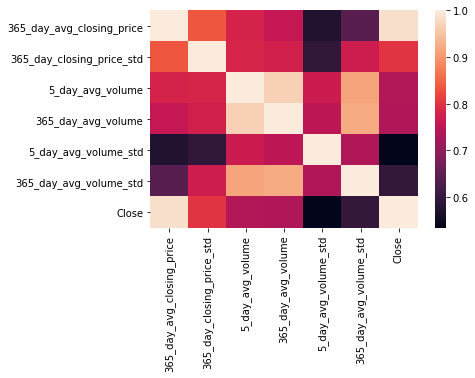

In [85]:
# plotting a correlation matrix heatmap
sns.heatmap(strongly_correlated_numerical_features_corr_mtx)
plt.show()

Among the features that are highly correlated, those pairs that stand the risk of data duplication include:
1. `5_day_avg_volume` and `365_day_avg_volume`

Let's confirm this by extracting the correlation strength between these pairs of features.

In [86]:
strongly_correlated_numerical_features_corr_mtx.loc['5_day_avg_volume','365_day_avg_volume']

0.9656798927837412

All these features are indeed posing a risk of data duplication(correlation strength > 0.9).

`5_day_avg_volume` is an insignificant indicator when compared to the trove of data that we actually have. In fact, this indicator is subsumed in the `365_day_avg_volume` indicator.

Hence, let's drop this column from the features that are going to be used for model training.

In [87]:
numerical_attributes.remove('5_day_avg_volume')
numerical_attributes

['365_day_avg_closing_price',
 '365_day_closing_price_std',
 '365_day_avg_volume',
 '5_day_avg_volume_std',
 '365_day_avg_volume_std',
 'Close']

### Removing features with low variance

To make like comparisons, we need perform min-max scaling.

In [88]:
feature_cols = numerical_attributes.copy()
feature_cols.remove(target)
feature_cols

['365_day_avg_closing_price',
 '365_day_closing_price_std',
 '365_day_avg_volume',
 '5_day_avg_volume_std',
 '365_day_avg_volume_std']

In [89]:
scaled_feature_data = (train_set[feature_cols] - train_set[feature_cols].min())/(train_set[feature_cols].max() - train_set[feature_cols].min())
scaled_feature_data

,365_day_avg_closing_price,365_day_closing_price_std,365_day_avg_volume,5_day_avg_volume_std,365_day_avg_volume_std
0,0.000000,0.003874,0.000113,4.531972e-07,0.000106
1,0.000010,0.003868,0.000113,2.530259e-06,0.000162
2,0.000020,0.003863,0.000113,2.031076e-06,0.000205
3,0.000028,0.003856,0.000112,1.954098e-06,0.000241
4,0.000037,0.003846,0.000113,5.385031e-05,0.000273
...,...,...,...,...,...
15481,0.916686,0.354264,0.675312,1.517280e-01,0.174648
15482,0.916882,0.354786,0.674467,1.423040e-01,0.174450
15483,0.917091,0.355271,0.673740,2.155540e-01,0.174256
15484,0.917256,0.355607,0.672876,3.027245e-01,0.174084


In [90]:
scaled_feature_data.var().sort_values()

5_day_avg_volume_std         0.005161
365_day_avg_volume_std       0.027260
365_day_closing_price_std    0.030383
365_day_avg_volume           0.050482
365_day_avg_closing_price    0.106145
dtype: float64

The column `5_day_avg_volume_std`, has values that don't have a lot of variability for the model to capture, and hence isn't helpful towards model's predictive abilities. Let's drop it.

In [91]:
numerical_attributes.remove('5_day_avg_volume_std')
numerical_attributes

['365_day_avg_closing_price',
 '365_day_closing_price_std',
 '365_day_avg_volume',
 '365_day_avg_volume_std',
 'Close']

### Finalizing the list of features to be used

In [92]:
# final list of features
features = [attr for attr in numerical_attributes if attr != target]
features

['365_day_avg_closing_price',
 '365_day_closing_price_std',
 '365_day_avg_volume',
 '365_day_avg_volume_std']

## Train and predict 

In [93]:
# training the model on train_set
lin_reg_mdl = LinearRegression()
lin_reg_mdl = lin_reg_mdl.fit(train_set[features],train_set[target])

In [94]:
# making predictions on test_set
predicted_index_closing_prices = lin_reg_mdl.predict(test_set[features])

In [95]:
# computing the quality of predictions
model_accuracy = mean_absolute_error(test_set[target],predicted_index_closing_prices)
model_accuracy

97.85787993564787

# Conlusion 

The model's error is significantly reduced when compared to the last time predictions were made, because we took into account other features while fitting the model, reducing the bias (which is an observable source of error).